##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [1]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
pytensor 2.35.1 requires nump

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [25]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

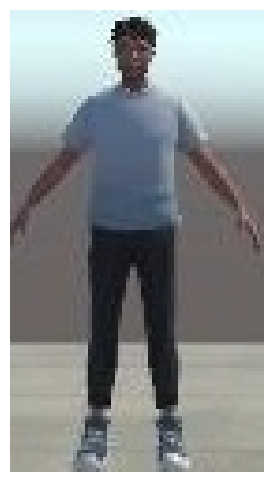

In [22]:
# !wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2
import matplotlib.pyplot as plt

# Read image using OpenCV (loads as BGR)
img = cv2.imread("cropped_result.jpg")

# Convert from BGR → RGB for correct color display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for cleaner view
plt.show()



Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


I0000 00:00:1764266251.605381 15599867 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 90.5), renderer: Apple M1 Pro
W0000 00:00:1764266251.685530 15627483 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1764266251.724528 15627487 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


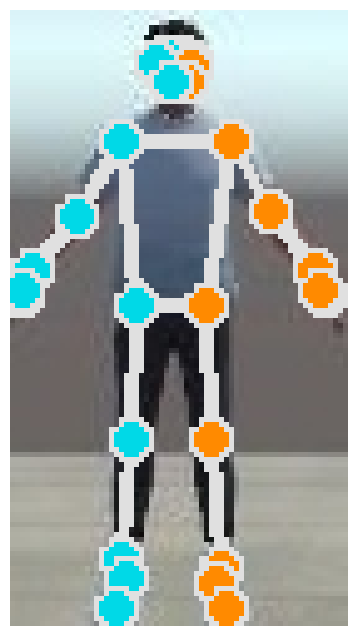

In [26]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have draw_landmarks_on_image() defined
# from your previous code.

# STEP 2: Create a PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("cropped_result.jpg")
rgb_image = image.numpy_view()  # Get as NumPy array (RGB)

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Draw landmarks and segmentation mask.
# Convert RGB -> BGR for MediaPipe drawing utils
bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)

annotated_bgr = draw_landmarks_on_image(bgr_image, detection_result)

# If you want to display with matplotlib (which expects RGB), convert back:
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)


# STEP 6: Display in Jupyter
plt.figure(figsize=(10, 8))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


Visualize the pose segmentation mask.

In [ ]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

In [20]:
#@markdown We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red

def crop_from_bbox(image, bbox):
    """
    image: numpy array (H,W,3)
    bbox: MediaPipe BoundingBox object (origin_x, origin_y, width, height)
    returns: cropped image
    """

    x1 = int(bbox.origin_x)
    y1 = int(bbox.origin_y)
    x2 = int(bbox.origin_x + bbox.width)
    y2 = int(bbox.origin_y + bbox.height)

    # Clamp to image bounds
    H, W = image.shape[:2]
    x1 = max(0, min(W, x1))
    y1 = max(0, min(H, y1))
    x2 = max(0, min(W, x2))
    y2 = max(0, min(H, y2))

    return image[y1:y2, x1:x2]

def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    if category_name == 'person':
      # Save crop
      crop = crop_from_bbox(image, detection.bounding_box)
      crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
      cv2.imwrite('cropped_result.jpg', crop)
        # Draw bounding_box
      bbox = detection.bounding_box
      start_point = bbox.origin_x, bbox.origin_y
      end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height

      cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

      probability = round(category.score, 2)
      result_text = category_name + ' (' + str(probability) + ')'
      text_location = (MARGIN + bbox.origin_x,
                      MARGIN + ROW_SIZE + bbox.origin_y)
      cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                  FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

I0000 00:00:1764266173.873491 15599867 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 90.5), renderer: Apple M1 Pro


DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=162, origin_y=256, width=61, height=117), categories=[Category(index=None, score=0.7620196342468262, display_name=None, category_name='traffic light')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=262, origin_y=251, width=66, height=122), categories=[Category(index=None, score=0.6520556211471558, display_name=None, category_name='traffic light')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=585, origin_y=361, width=68, height=124), categories=[Category(index=None, score=0.6110963821411133, display_name=None, category_name='person')], keypoints=[])])


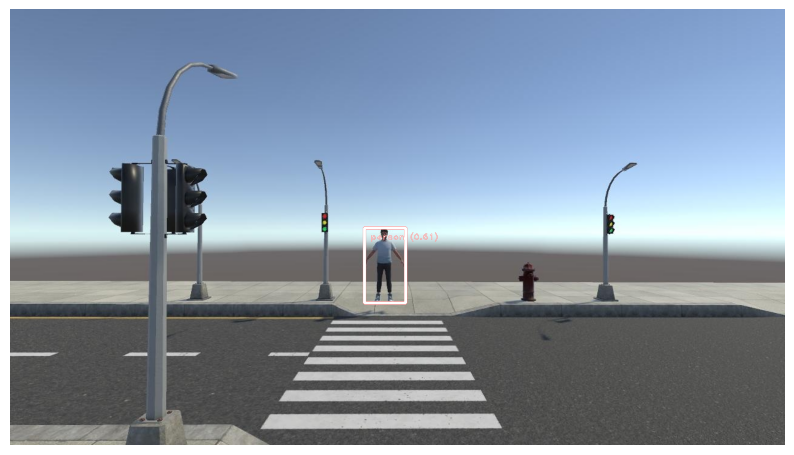

In [21]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt


# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet_lite2.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.6)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file('test.jpg')

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)
print(detection_result)
# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)

# STEP 6: Display in Jupyter
plt.figure(figsize=(10, 8))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()